In [1]:
import os, sys
os.environ['ON_PY']="1"
os.chdir("/home/wlc/FJSP-DRL-MAML")
from datetime import datetime
import numpy as np
from params import parser
from Trainer import MultiTaskTrainer
import matplotlib.pyplot as plt
n_j = 10
n_m = 5

exp = "MAMLMK"
hidden_dim=64
n_j_options=[str(int(_)) for _ in np.linspace(5, 25, 6)]
n_m_options=n_j_options[::-1]

n_j_options = ["15", "10",]
n_m_options = ["5", "5",]
op_per_job_options=n_m_options
TIMESTAMP = "{0:%Y-%m-%dT%H-%M-%S/}".format(datetime.now())
num_tasks=len(n_j_options)


args = [
    "--logdir", f"./runs/{exp}/{TIMESTAMP}",
    "--model_suffix", exp,
    "--meta_iterations", "1000",
    "--maml_model", "True", 
    "--num_tasks", f"{num_tasks}",
    "--hidden_dim_actor", f"{hidden_dim}",
    "--hidden_dim_critic",  f"{hidden_dim}",
    "--n_j_options", *n_j_options, 
    "--n_m_options", *n_m_options, 
    "--op_per_job_options", *op_per_job_options, 
    ]
print(args)
configs = parser.parse_args(args=args)

trainer = MultiTaskTrainer(configs)

trainer.train()



pygame 2.5.2 (SDL 2.28.2, Python 3.10.13)
Hello from the pygame community. https://www.pygame.org/contribute.html
(CVXPY) Apr 17 05:02:24 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Apr 17 05:02:24 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


/home/wlc/miniconda3/envs/RL-torch/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/wlc/miniconda3/envs/RL-torch/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda9SetDeviceEi'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


['--logdir', './runs/MAMLMK/2024-04-17T17-02-25/', '--model_suffix', 'MAMLMK', '--meta_iterations', '1000', '--maml_model', 'True', '--num_tasks', '2', '--hidden_dim_actor', '64', '--hidden_dim_critic', '64', '--n_j_options', '15', '10', '--n_m_options', '5', '5', '--op_per_job_options', '5', '5']
-------------------------Training Setting-------------------------
source : SD2
vali_data = ./data/data_train_vali/SD2/10x5x0+mix
save model name:  maml+MAMLMK1713344545
vali data :./data/data_train_vali/SD2/10x5x0+mix
instance dir : ./data/data_train_vali/SD2/10x5x0+mix/123
tensorboard logdir: ./runs/MAMLMK/2024-04-17T17-02-25/


timestamp = 2024-04-17T17-02-25
self.n_js:  [15, 10]
self.n_m_options:  [5, 5]
self.op_per_job_options:  [5, 5]
1458.9
Episode 1
 reward: -8.461616160761453 -6.274747474113662
 Mean_loss: 1.80723953,  training time: 2.92
1464.9
Episode 2
 reward: -8.812121211231098 -6.045454544843894
 Mean_loss: 1.88999438,  training time: 2.49
1453.6999999999998
Episode 3
 reward: 

KeyboardInterrupt: 

In [ ]:
from sklearn.decomposition import PCA
from model.PPO import PPO_initialize
import torch
# 初始化 PPO 和参数列表
models = [f"{n_j}x{n_m}x0+mix" for n_j in range(5, 26, 5) for n_m in range(5, 26, 5) if n_j > n_m]
models.append("10x5+mix+SD2")
args = ["--test_data", "10x5+mix", "20x5+mix", "15x10+mix", "20x10+mix", "--test_model", *models]
configs = parser.parse_args(args=args)
test_model = [(f'./trained_network/{configs.model_source}/{model_name}.pth', model_name) for model_name in configs.test_model]

param_list = []

# 加载模型参数
for model_path, model_name in test_model:
    ppo = PPO_initialize(configs)
    # print(model_path)
    ppo.policy.load_state_dict(torch.load(model_path, map_location='cuda'))
    parameters = list(ppo.policy.actor.parameters())
    
    param_list.append(parameters)

[[ 2.5423517  -0.12674333]
 [ 2.7565384  -0.29944083]
 [ 3.0518165   0.26355535]
 [ 2.484021   -0.72728705]
 [ 2.8159833   0.49386576]
 [ 3.163969    1.377553  ]
 [ 2.842587    0.56550425]
 [ 3.209573    1.9125552 ]
 [ 3.1337335   2.7645795 ]
 [ 3.3813934   1.9088396 ]
 [ 3.0400047  -0.30941486]
 [-1.3637311   0.5141052 ]
 [-1.3329681   0.51451737]
 [-1.3112276   0.5131544 ]
 [-1.2747637   0.50426584]
 [-1.2217257   0.48089796]
 [-1.185845    0.46897566]
 [-1.1766057   0.46638188]
 [-1.1795684   0.46448678]
 [-1.1861957   0.46856043]
 [-1.1973428   0.47408682]
 [-1.195833    0.4710587 ]
 [-1.1902726   0.46587887]
 [-1.1923692   0.46566856]
 [-1.1954126   0.4691878 ]
 [-1.1831367   0.46658206]
 [-1.1667981   0.45569715]
 [-1.1365316   0.43862745]
 [-1.1147449   0.4345751 ]
 [-1.0641603   0.41799998]
 [-1.013225    0.3884416 ]
 [-0.982884    0.36084113]
 [-0.98319566  0.358834  ]
 [-0.9951177   0.3524999 ]
 [-0.99310565  0.346872  ]
 [-0.9621915   0.33574477]
 [-0.94643265  0.33150336]
 

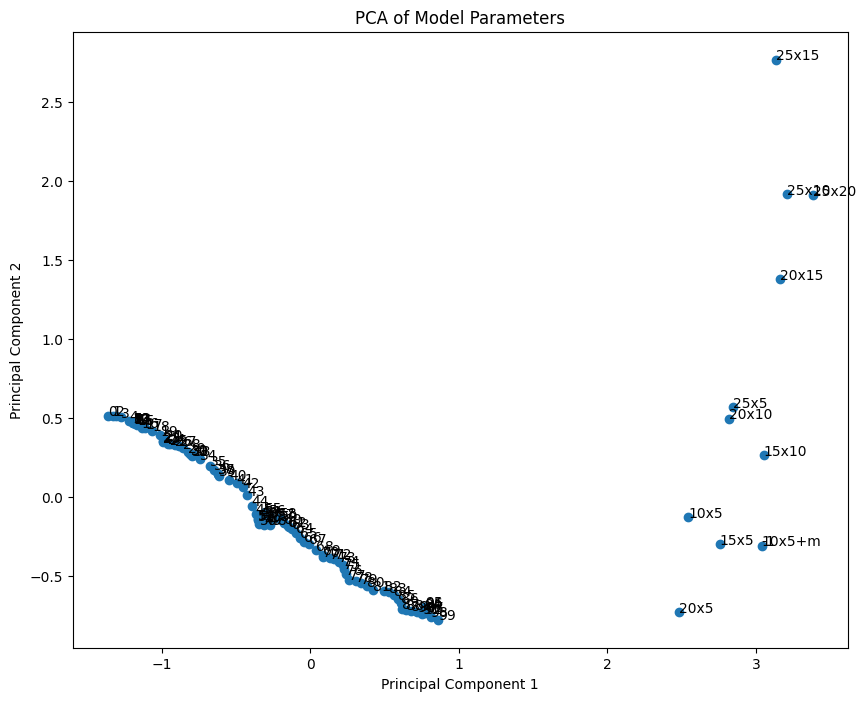

In [ ]:

train_param = trainer.train_param_list


collation_param = [*param_list, *train_param]
param_matrix = np.array([np.concatenate([p.data.cpu().numpy().flatten() for p in params]).flatten() for params in collation_param])

# 使用 PCA 进行降维
pca = PCA(n_components=2)
params_reduced = pca.fit_transform(param_matrix)

# 绘制结果，为每个点添加模型名称标签
plt.figure(figsize=(10, 8))  # 可以调整大小以更好地适应所有标签
plt.scatter(params_reduced[:, 0], params_reduced[:, 1], marker='o')

print(params_reduced)
# 为每个点添加文本标签
end_i = 0
for i, label in enumerate([name for _, name in test_model]):
    plt.annotate(label[:-6], (params_reduced[i, 0], params_reduced[i, 1]))
    end_i = i

while end_i < len(params_reduced):
    plt.annotate(f"{end_i - len(test_model)}", (params_reduced[end_i, 0], params_reduced[end_i, 1]))
    end_i += 1

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Model Parameters')
plt.show()
